In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

from jcopml.pipeline import num_pipe, cat_pipe

In [ ]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.9 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=b01b71ebb796ca1c634c4ebe659d0399b13e1f3fc6529087702cf543c2e4f4ae
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


In [ ]:
data = pd.read_csv('balance-scale.csv')
data

,Class,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


## NAIVE BAYES

In [ ]:
x = data.drop(columns = 'Class')
y = data.Class

# Decision Tree

In [ ]:
features = data.iloc[:, [1,2,3,4]].values
target = data.iloc[:, 0].array

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=0, max_depth=None,
                                      min_samples_split=2, min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

In [ ]:
model = decisiontree.fit(features, target)

In [ ]:
observation = [[5, 4, 3, 2]]
model.predict(observation)
model.predict_proba(observation)

array([[0., 1., 0.]])

In [ ]:
import pydotplus
from sklearn import tree
dot_data = tree.export_graphviz(decisiontree, out_file=None)

from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('balance.png')

True

# Data training dan pre processing Naive Bayes

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x.shape,y.shape,x_train.shape,x_test.shape, y_train.shape, y_test.shape

((625, 4), (625,), (500, 4), (125, 4), (500,), (125,))

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])
])

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

# Hasil Naive Bayes

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Left-Weight',
                                                   'Left-Distance',
                                                   'Right-Weight',
                                                   'Right-Distance'])])),
                ('algo', GaussianNB())])

In [ ]:
pipeline.score(x_train, y_train), pipeline.score(x_test, y_test)

(0.906, 0.888)

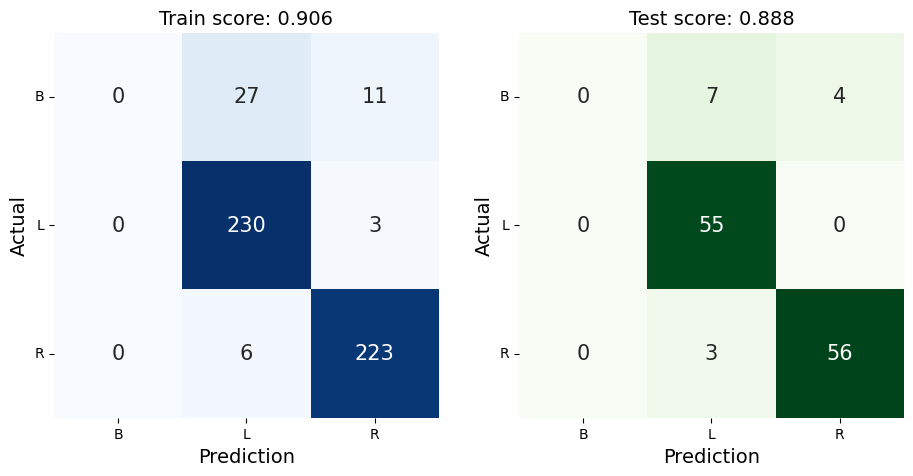

In [ ]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(x_train, y_train, x_test, y_test, pipeline)

# Prediksi Naive Bayes

In [ ]:
x_pred = pd.read_csv('test-balance-scale.csv')
x_pred

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,1,2,5,1


In [ ]:
x_pred['prediksi-class'] = pipeline.predict(x_pred)
x_pred

,Left-Weight,Left-Distance,Right-Weight,Right-Distance,prediksi-class
0,1,2,5,1,R
